# Simple Data Visualizations You Should Know in R

* Code by 
* Elisa Du, Health Statistics Research Assistant & Abdul Majed Raja, Analytics Consultant

Data visualization is an innovative and exciting field. Although it involves long hours behind a computer screen and a knack for numbers, it's a highly rewarding profession that is very much in its early stages — and it's growing every day.

Although there are few dedicated programs for visualizing data, many data scientists use a programming language called R — and it and its many available packages provide many different forms of visualization for nearly every scenario imaginable.

Below are selection of 7 essential data visualizations, and how to recreate them using a mix of base R functions and a few common packages. The examples all make use of datasets included in a default R base installation.

In [1]:
list.of.packages <- c("corrplot","datasets","dplyr","ggplot2","scatterplot3d")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(datasets)
library(dplyr) #data manipulation
library(ggplot2) #data visualization
library(corrplot) #correlogram
library(scatterplot3d)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

corrplot 0.84 loaded


## 1. Bar Chart

You're probably already familiar with the basic bar chart from elementary school, high school and college. The concept of the bar chart in R is the same as it was in the past scenarios — to show a categorical comparison between two or more variables. However, there are several different types of bar charts to know and understand.

Horizontal and vertical bar charts are already common and familiar — they are standard formats in most academic or professional presentations. But R provides a stacked bar chart that lets you introduce different variables to each category.

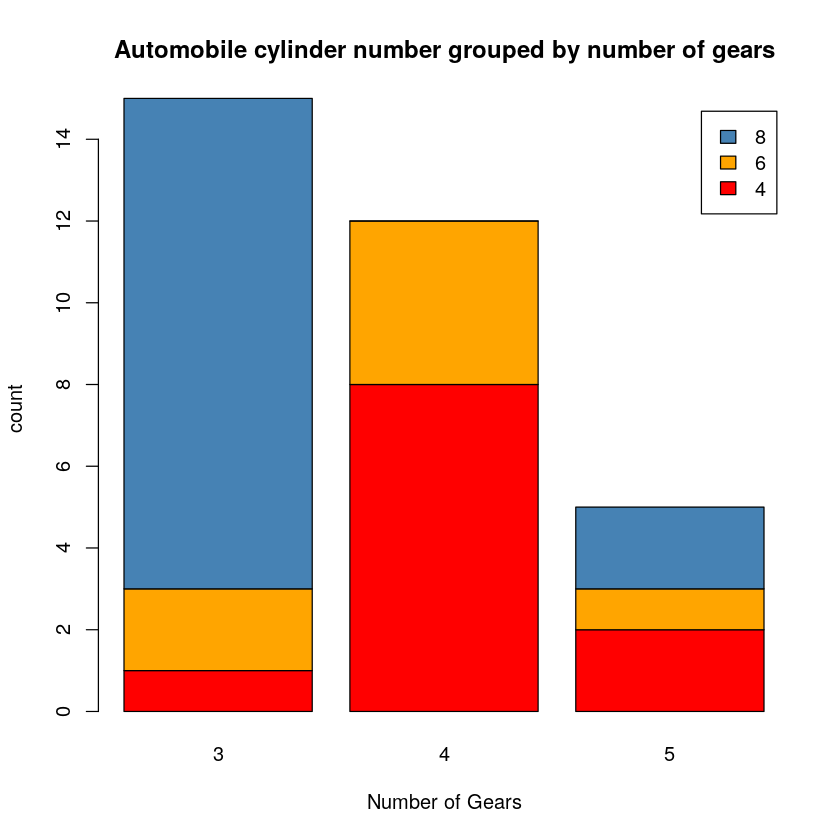

In [2]:
Numbers<-table(mtcars$cyl,mtcars$gear)
barplot(Numbers,main='Automobile cylinder number grouped by number of gears', 
        col=c('red','orange', 'steelblue'),legend=rownames(Numbers),xlab='Number of Gears',
        ylab='count')

## 2. Histogram

Histograms are standard in some academic fields, but they're usually reserved for the senior-most levels. These charts are best with highly precise or accurate numbers in R.

It ultimately provides a probability estimate of a variable — the period of time before a project's completion, for example. R provides a simple function for this as well.



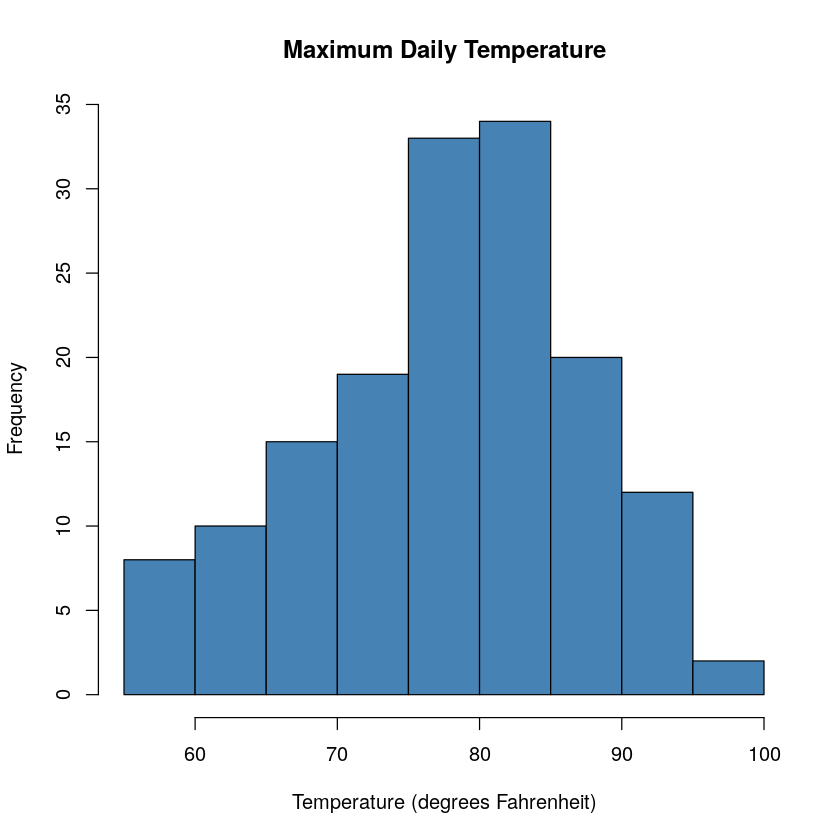

In [3]:
# histogram of frequency of ozone values in 'airquality' dataset
hist(airquality$Temp,col='steelblue',main='Maximum Daily Temperature',
     xlab='Temperature (degrees Fahrenheit)')


## 3. Heat Map

 
One of the most innovative data visualizations in R, the heat map emphasizes color intensity to visualize relationships between multiple variables.

The result is an attractive 2D image that is easy to interpret. As a basic example, a heat map highlights the popularity of competing items by ranking them according to their original market launch date. It breaks it down further by providing sales statistics and figures over the course of time. 

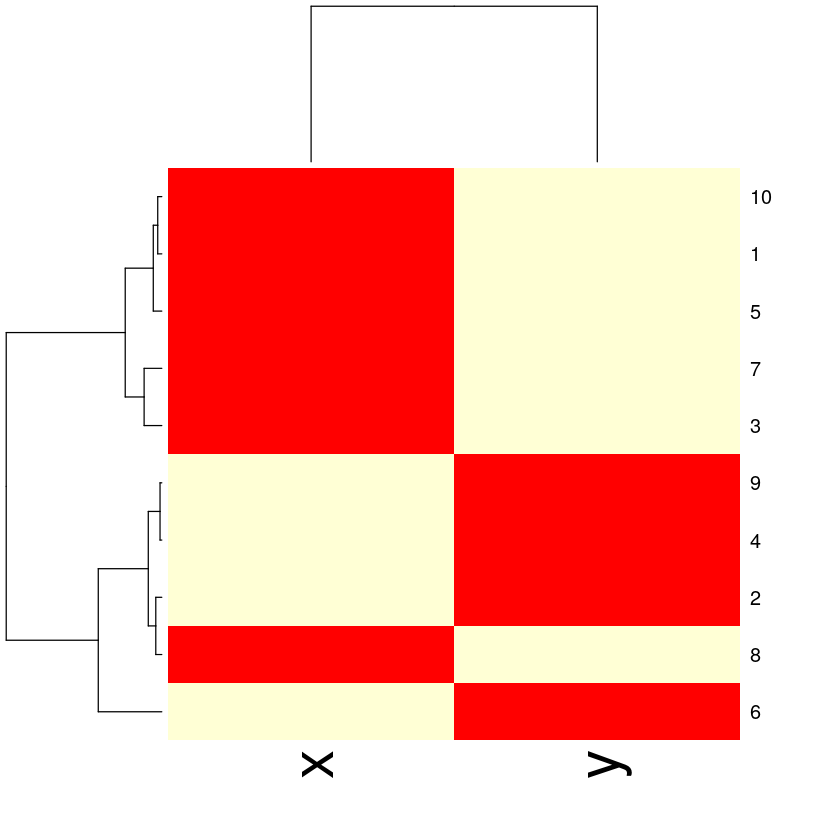

In [4]:
# simulate a dataset of 10 points
x<-rnorm(10,mean=rep(1:5,each=2),sd=0.7) 
y<-rnorm(10,mean=rep(c(1,9),each=5),sd=0.1)
dataFrame<-data.frame(x=x,y=y)
set.seed(143)
dataMatrix<-as.matrix(dataFrame)[sample(1:10),] # convert to class 'matrix', then shuffle the rows of the matrix
heatmap(dataMatrix) # visualize hierarchical clustering via a heatmap 



## 4. Scatter Plot

 
Plotting is a popular alternative to charting or graphing. It provides a unique visualization involving various dots. The most standard iteration — the scatter plot — tracks two continuous variables over the course of time. A basic application of the scatter plot involves tracking the height and weight of children throughout the years.

Scatter plots are useful when trying to avoid misinformation in the visualization. Only use a plot if you're sure the audience is familiar with that type of chart, and always use it sparingly. When in doubt, go with one of your other options.

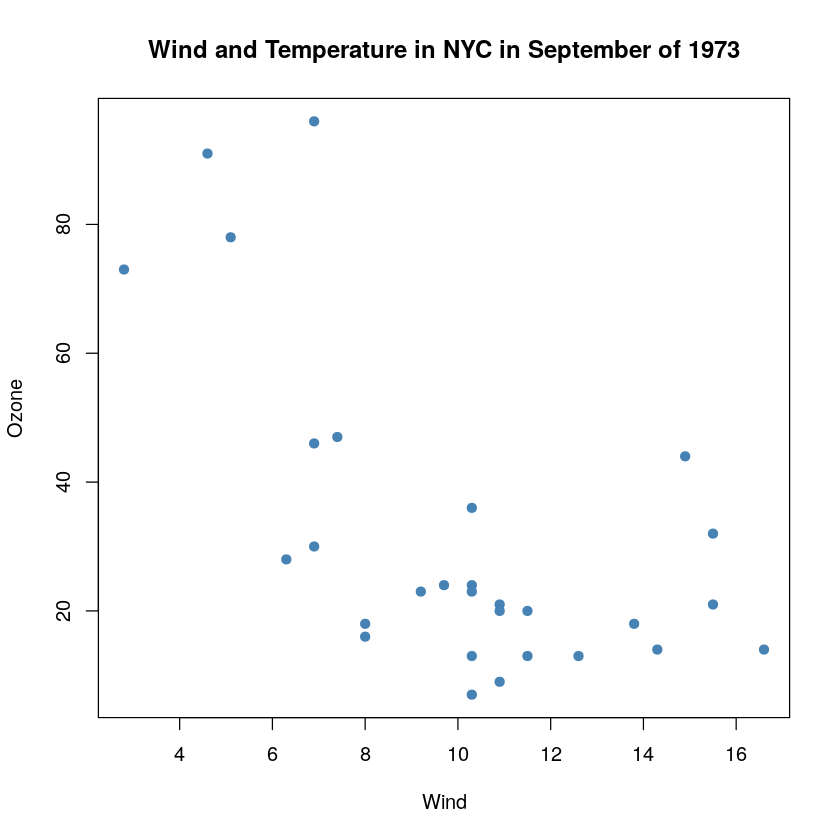

In [5]:
# Plot Ozone and Temperature measurements for only the month of September 
with(subset(airquality,Month==9),plot(Wind,Ozone,col='steelblue',pch=20,cex=1.5)) 
title('Wind and Temperature in NYC in September of 1973')


### 3-D Scatterplot

The ggplot2 package and its extensions can’t create a 3-D plot. However, you can create a 3-D scatterplot with the scatterplot3d function in the scatterplot3d package.

Let’s say that we want to plot automobile mileage vs. engine displacement vs. car weight using the data in the mtcars dataframe.

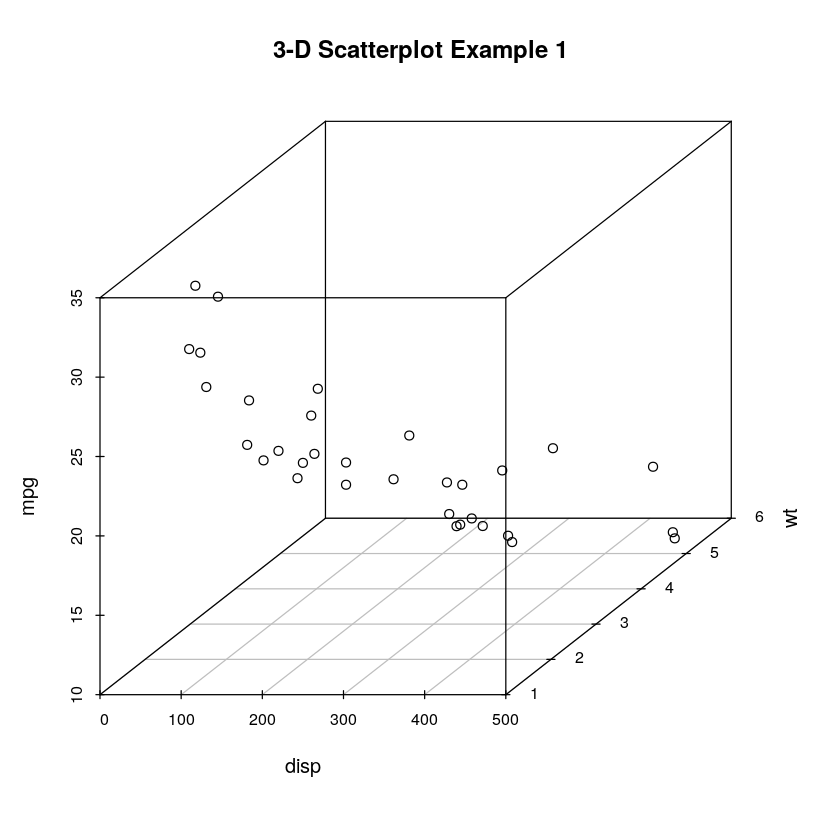

In [6]:
# basic 3-D scatterplot
with(mtcars, {
   scatterplot3d(x = disp,
                 y = wt, 
                 z = mpg,
                 main="3-D Scatterplot Example 1")
})

Now lets, modify the graph by replacing the points with filled blue circles, add drop lines to the x-y plane, and create more meaningful labels.

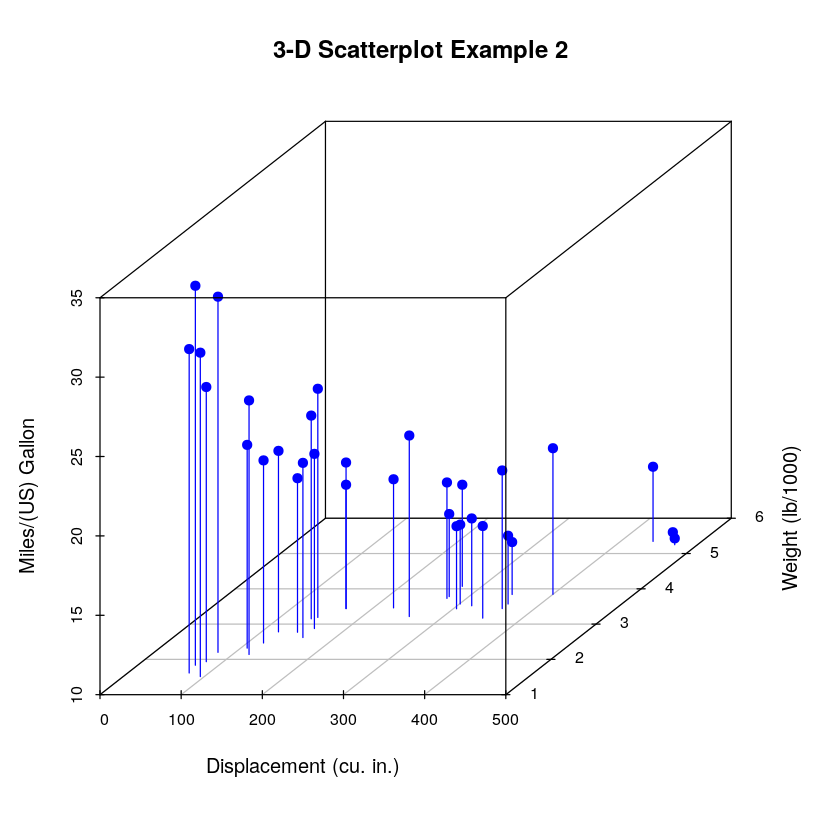

In [7]:

with(mtcars, {
  scatterplot3d(x = disp, 
                y = wt, 
                z = mpg, 
                # filled blue circles
                color="blue", 
                pch=19, 
                # lines to the horizontal plane
                type = "h",
                main = "3-D Scatterplot Example 2",
                xlab = "Displacement (cu. in.)",
                ylab = "Weight (lb/1000)",
                zlab = "Miles/(US) Gallon")
})

Next, let’s label the points. We can do this by saving the results of the scatterplot3d function to an object, using the xyz.convert function to convert coordinates from 3-D (x, y, z) to 2D-projections (x, y), and apply the text function to add labels to the graph.

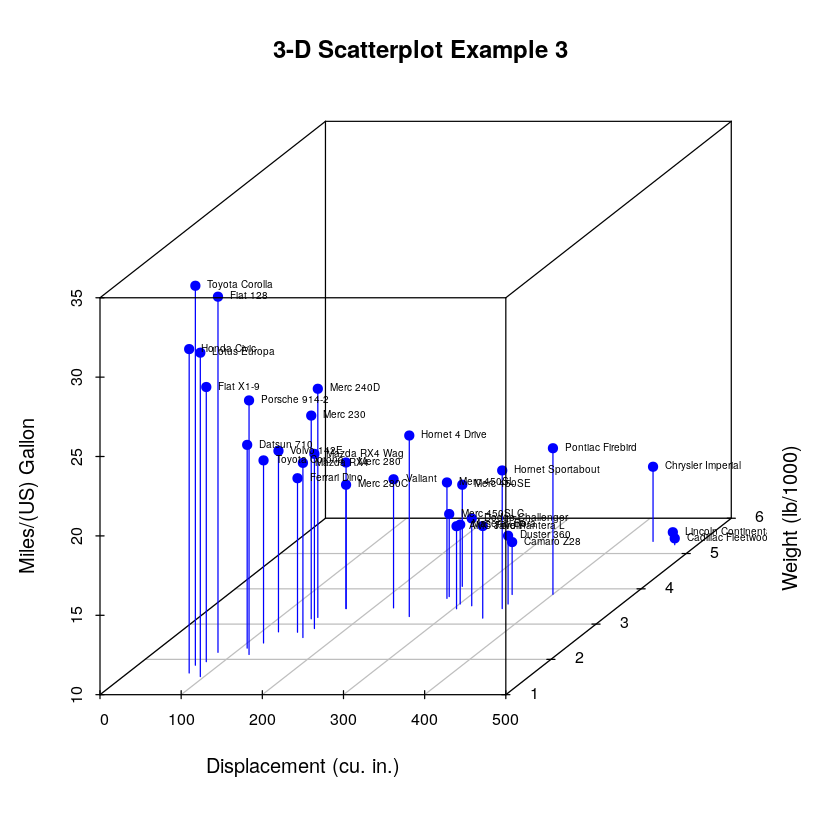

In [8]:
with(mtcars, {
  s3d <- scatterplot3d(
    x = disp, 
    y = wt, 
    z = mpg,
    color = "blue", 
    pch = 19,      
    type = "h",
    main = "3-D Scatterplot Example 3",
    xlab = "Displacement (cu. in.)",
    ylab = "Weight (lb/1000)",
    zlab = "Miles/(US) Gallon")
  
  # convert 3-D coords to 2D projection
  s3d.coords <- s3d$xyz.convert(disp, wt, mpg) 
  
  # plot text with 50% shrink and place to right of points
  text(s3d.coords$x, 
       s3d.coords$y,   
       labels = row.names(mtcars),  
       cex = .5, 
       pos = 4)
})

Almost there. As a final step, we will add information on the number of cylinders in each car. To do this, we’ll add a column to the mtcars dataframe indicating the color for each point. For good measure, we will shorten the y-axis, change the drop lines to dashed lines, and add a legend.

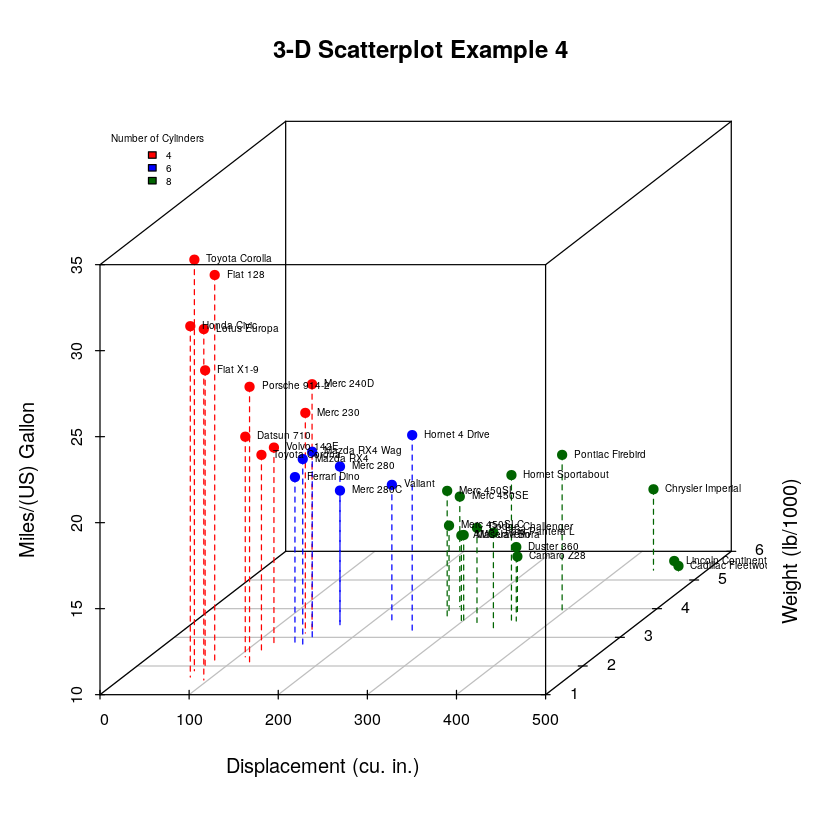

In [9]:
# create column indicating point color
mtcars$pcolor[mtcars$cyl == 4] <- "red"
mtcars$pcolor[mtcars$cyl == 6] <- "blue"
mtcars$pcolor[mtcars$cyl == 8] <- "darkgreen"

with(mtcars, {
    s3d <- scatterplot3d(
      x = disp, 
      y = wt, 
      z = mpg,
      color = pcolor, 
      pch = 19, 
      type = "h", 
      lty.hplot = 2, 
      scale.y = .75,
      main = "3-D Scatterplot Example 4",
      xlab = "Displacement (cu. in.)",
      ylab = "Weight (lb/1000)",
      zlab = "Miles/(US) Gallon")
    
     s3d.coords <- s3d$xyz.convert(disp, wt, mpg)
     text(s3d.coords$x, 
          s3d.coords$y, 
          labels = row.names(mtcars), 
          pos = 4, 
          cex = .5)  
     
# add the legend
legend(#location
       "topleft", 
       inset=.05,
       # suppress legend box, shrink text 50%
       bty="n", 
       cex=.5, 
       title="Number of Cylinders",
       c("4", "6", "8"), 
       fill=c("red", "blue", "darkgreen"))
})

We can easily see that the car with the highest mileage (Toyota Corolla) has low engine displacement, low weight, and 4 cylinders.

## 5. Box Plot

 
The box plot resembles a bar chart in many respects. Instead of focusing on categorical data, box plots provide visualization for both categorical and continuous variable data.

In the real world, box plots give detailed information on weather patterns and how they change over the course of time.  

[1] "factor"

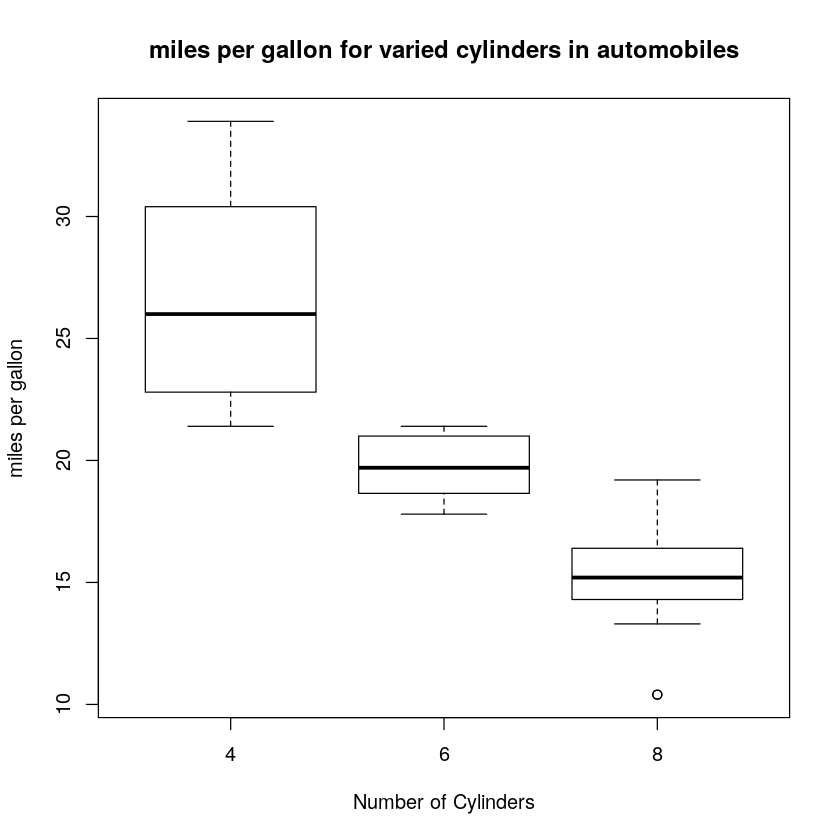

In [10]:
mtcars<-transform(mtcars,cyl=factor(cyl)) # convert 'cyl' column from class 'numeric' to class 'factor'
class(mtcars$cyl) # 'cyl' is now a categorical variable 
boxplot(mpg~cyl,mtcars,xlab='Number of Cylinders',ylab='miles per gallon',
        main='miles per gallon for varied cylinders in automobiles',cex.main=1.2)


## 6. Correlogram

 
Correlated data is best visualized through corrplot. The 2D format is similar to a heat map, but it highlights statistics that are directly related.

Most correlograms highlight the amount of correlation between datasets at various points in time. Comparing sales data between different months or years is a basic example.

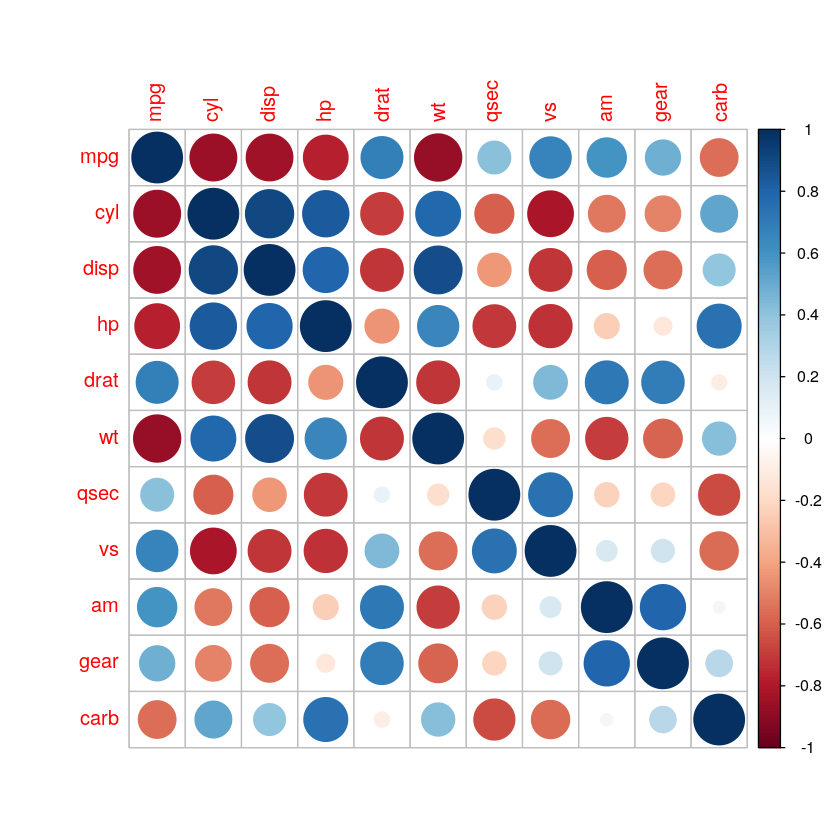

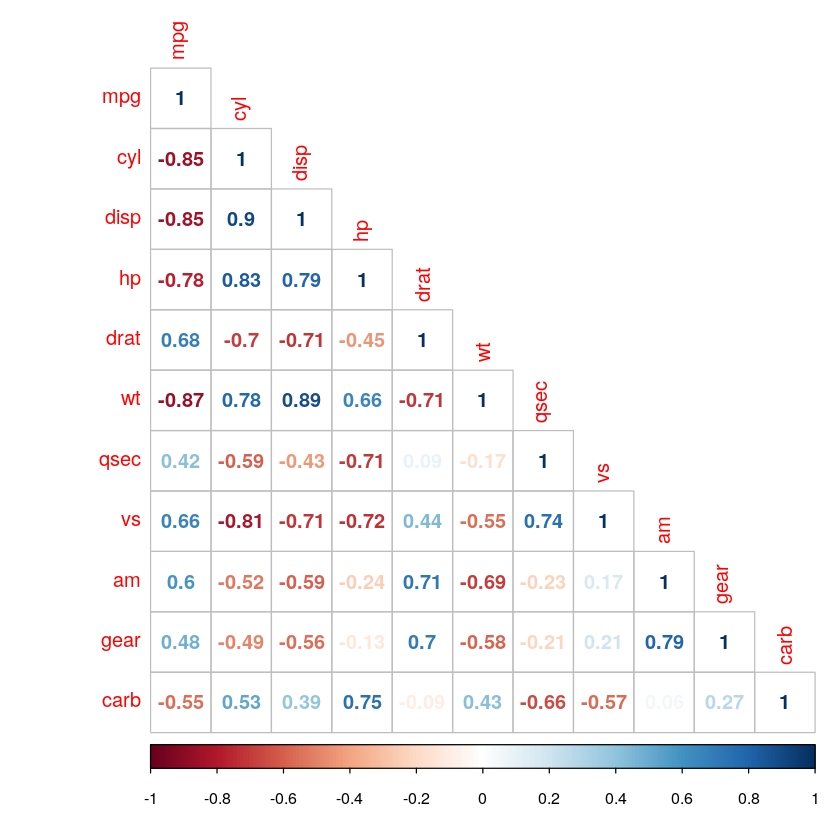

In [12]:
data("mtcars")

corr_matrix <- cor(mtcars)

# with circles
corrplot(corr_matrix)

# with numbers and lower
corrplot(corr_matrix,
         method = 'number',
         type = "lower")

## 7. Area Chart

 
Area charts express continuity between different variables or data sets. It's akin to the traditional line chart you know from grade school and is used in a similar fashion.

Most area charts highlight trends and their evolution over the course of time, making them highly effective when trying to expose underlying trends — whether they're positive or negative. 

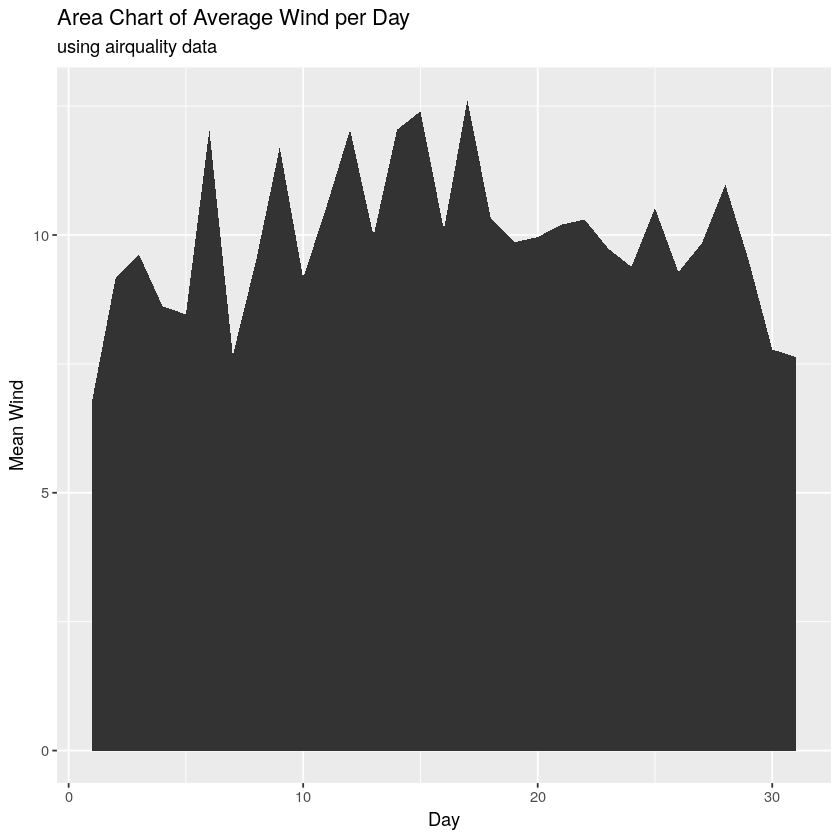

In [13]:
#data("airquality") #dataset used

airquality %>% 
  group_by(Day) %>% 
  summarise(mean_wind = mean(Wind)) %>% 
  ggplot() + 
  geom_area(aes(x = Day, y = mean_wind)) + 
  labs(title = "Area Chart of Average Wind per Day",
       subtitle = "using airquality data",
       y = "Mean Wind")


Base Code by 
 Elisa Du, Health Statistics Research Assistant & Abdul Majed Raja, Analytics Consultant


See also

https://rkabacoff.github.io/datavis/